In [2]:
import sys
 
sys.path.append('../')

import torch

from agents.cvx_nets import Cvx_Nets
from agents.Q_learning_agent import Q_Learning
from environments.cart import MyEnv
from utilities.config import Config

In [3]:
config = Config()
config.seed = 1
config.environment = MyEnv()
config.num_episodes_to_run = 10  # for Q-learning
config.num_taining_step_every_trajectory_step = 3
config.visualise_results = False
config.file_to_save_data_results = None
config.file_to_save_results_graph = None
config.use_GPU = False
config.save_model = False


config.hyperparameters = {
            "num_input": 2,
            "num_output": 1,
            "num_u": 5,
            "learning_rate": 1e-4,
            "gamma": 1.0,  # discount_rate
            "target_update": 10,
            "batch_size": 20,
            "buffer_size": 10000,
}

In [4]:
if __name__ == "__main__":
    net = Cvx_Nets
    trainer = Q_Learning(config, net)
    trainer.run()

In [304]:
trainer.run()

[step_total: 900] training loss: 176.110
[step_total: 1000] training loss: 100.506
[step_total: 1100] training loss: 45.569
[step_total: 1200] training loss: 22.582
[step_total: 1300] training loss: 6.500
[step_total: 1400] training loss: 18.571
[step_total: 1500] training loss: 5.980
[step_total: 1600] training loss: 11.697


In [305]:
trainer.env.close() 

Text(0.5, 0, 'transition step')

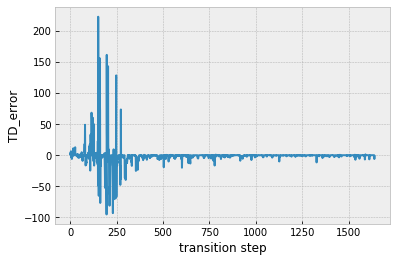

In [306]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.plot(trainer.TD_error)
plt.ylabel('TD_error')
plt.xlabel('transition step')

Text(0.5, 0, 'transition step')

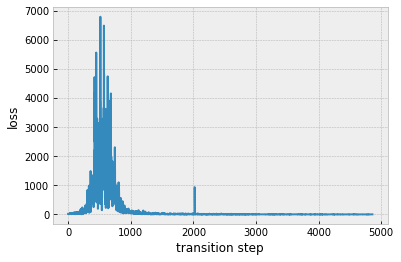

In [307]:
plt.plot(trainer.losses)
plt.ylabel('loss')
plt.xlabel('transition step')

shape of x0: (10201, 2)  |shape of [cost, u]: (10201, 6)
Example, x: tensor([-5., -5.])  |cost_u[0]: tensor([2.7276e+03, 5.0000e-01, 5.0000e-01, 5.0000e-01, 5.0000e-01, 5.0000e-01])


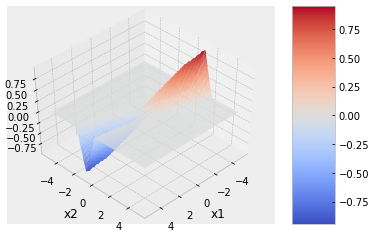

In [317]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from torch.autograd import Variable

npzfile=np.load('dbin_cost.npz') 
x0 = npzfile['x'] 
c_u = npzfile['cost_u'] 

# get x0, u0 from dataset
print("shape of x0:",x0.shape," |shape of [cost, u]:",c_u.shape)
X1 = x0[:,0]
X2 = x0[:,1]
U0 = c_u[:,1]

x = Variable(torch.from_numpy(x0).float(), requires_grad=False)
y = Variable((torch.from_numpy(c_u[:,:])).float(), requires_grad=False)

print("Example, x:", x[0], " |cost_u[0]:",y[0,:])
trainer.current_net.eval()
with torch.no_grad():
    _, out_pre = trainer.current_net(x)
U0_pre = out_pre.cpu().numpy()

# print u0-u0_pre

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(X1, X2, U0-U0_pre,cmap=cm.coolwarm )
plt.ylabel('x2')
plt.xlabel('x1')
ax.set_zlabel('u0  ')
ax.view_init(elev=45,azim=45)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=1, aspect=5)

plt.show()


Text(0.5, 0, 'u0  ')

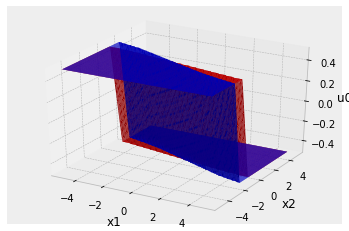

In [318]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X1, X2, U0,color="b")
ax.plot_trisurf(X1, X2, U0_pre,color="r" )
plt.ylabel('x2')
plt.xlabel('x1')
ax.set_zlabel('u0  ')